# ** Pizza Sales Data Analysis**

**Objective:**

The goal of this project is to analyze pizza sales data from a restaurant to extract meaningful insights about sales trends, customer preferences, and pricing strategies. This analysis will help the restaurant optimize its operations, understand customer behavior, and improve business performance.




**Key Questions:**

1.What are the most popular pizza categories and sizes?


*   Which pizza sizes (Small, Medium, Large) are ordered most frequently?

* What categories (e.g., Veggie, Classic, Supreme) are most popular?  

2.What is the distribution of pizza prices across different sizes and
categories?
* What is the distribution of pizza prices across different sizes and
in ingredients and category?  
* Are there trends in pizza orders over time?

3. Is there a linear correlation between unit price and total price Customer Purchase Patterns etc.

**By the end of this analysis, the restaurant will have a better understanding of customer preferences, sales trends, and opportunities for pricing optimization and product promotion.**

In [42]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [43]:
# Load the dataset
file_path = '/content/pizza_sales.csv'
data = pd.read_csv(file_path)

In [44]:
# Display the first few rows of the data to understand its structure
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48622 entries, 0 to 48621
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   p_id               48622 non-null  int64  
 1   o_id               48622 non-null  int64  
 2   pizza_name_id      48622 non-null  object 
 3   qty                48622 non-null  object 
 4   order_date         48622 non-null  object 
 5   order_time         48622 non-null  object 
 6   u price            48622 non-null  float64
 7   total_price        48622 non-null  float64
 8   pizza_size         48622 non-null  object 
 9   pizza_category     48622 non-null  object 
 10  pizza_ingredients  48622 non-null  object 
 11  pizza_name         48622 non-null  object 
 12  Phone No           0 non-null      float64
 13  Customer Gender    0 non-null      float64
dtypes: float64(4), int64(2), object(8)
memory usage: 5.2+ MB


(   p_id  o_id  pizza_name_id qty order_date order_time  u price  total_price  \
 0     1     1     hawaiian_m   1   1/1/2015   11:38:36    13.25        13.25   
 1     2     2  classic_dlx_m   1   1/1/2015   11:57:40    16.00        16.00   
 2     3     2  five_cheese_l   1   1/1/2015   11:57:40    18.50        18.50   
 3     4     2    ital_supr_l   1   1/1/2015   11:57:40    20.75        20.75   
 4     5     2     mexicana_m   1   1/1/2015   11:57:40    16.00        16.00   
 
   pizza_size pizza_category  \
 0          M        Classic   
 1          M        Classic   
 2          L         Veggie   
 3          L        Supreme   
 4          M         Veggie   
 
                                    pizza_ingredients  \
 0           Sliced Ham, Pineapple, Mozzarella Cheese   
 1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
 2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
 3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
 4  Tomatoes, Red Peppers, Jalape

**Step 1: Data Cleaning**

In [45]:
# Dropping duplicate rows
data_cleaned = data.drop_duplicates()

In [46]:
print(data_cleaned.head())

   p_id  o_id  pizza_name_id qty order_date order_time  u price  total_price  \
0     1     1     hawaiian_m   1   1/1/2015   11:38:36    13.25        13.25   
1     2     2  classic_dlx_m   1   1/1/2015   11:57:40    16.00        16.00   
2     3     2  five_cheese_l   1   1/1/2015   11:57:40    18.50        18.50   
3     4     2    ital_supr_l   1   1/1/2015   11:57:40    20.75        20.75   
4     5     2     mexicana_m   1   1/1/2015   11:57:40    16.00        16.00   

  pizza_size pizza_category  \
0          M        Classic   
1          M        Classic   
2          L         Veggie   
3          L        Supreme   
4          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...

In [47]:

# Drop irrelevant or empty columns
data_cleaned = data.drop(columns=['Phone No', 'Customer Gender'])

In [48]:
print(data_cleaned.head())

   p_id  o_id  pizza_name_id qty order_date order_time  u price  total_price  \
0     1     1     hawaiian_m   1   1/1/2015   11:38:36    13.25        13.25   
1     2     2  classic_dlx_m   1   1/1/2015   11:57:40    16.00        16.00   
2     3     2  five_cheese_l   1   1/1/2015   11:57:40    18.50        18.50   
3     4     2    ital_supr_l   1   1/1/2015   11:57:40    20.75        20.75   
4     5     2     mexicana_m   1   1/1/2015   11:57:40    16.00        16.00   

  pizza_size pizza_category  \
0          M        Classic   
1          M        Classic   
2          L         Veggie   
3          L        Supreme   
4          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...

In [27]:
# Rename Columns
data_renamed = data.rename(columns={
    'p_id': 'Pizza_id',
    'o_id': 'Order_id',
    'qty': 'Quantity',
    'u price': 'Unit Price'
})

In [49]:
# Display the updated DataFrame
print(data_renamed.head())

   Pizza_id  Order_id  pizza_name_id  Quantity order_date order_time  \
0         1         1     hawaiian_m       1.0 2015-01-01   11:38:36   
1         2         2  classic_dlx_m       1.0 2015-01-01   11:57:40   
2         3         2  five_cheese_l       1.0 2015-01-01   11:57:40   
3         4         2    ital_supr_l       1.0 2015-01-01   11:57:40   
4         5         2     mexicana_m       1.0 2015-01-01   11:57:40   

   Unit Price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Cal

In [50]:

# Convert 'order_date' to datetime format
data['order_date'] = pd.to_datetime(data['order_date'], dayfirst=True, errors='coerce')


In [51]:
# Handle missing values in 'order_date'
data_cleaned.dropna(subset=['order_date'], inplace=True)

In [52]:
# Convert 'qty' and 'total_price' to numeric
data['qty'] = pd.to_numeric(data['qty'], errors='coerce')
data['total_price'] = pd.to_numeric(data['total_price'], errors='coerce')

In [53]:
# Drop rows with missing or NaN values in key columns like 'order_date', 'qty', or 'total_price'
data_cleaned = data.dropna(subset=['order_date', 'qty', 'total_price'])


# **Step 2: Exploratory Data Analysis and Visualizations**


In [54]:
# Sales by Pizza Category
category_sales = data_cleaned.groupby('pizza_category')['qty'].sum().reset_index()


In [55]:
# Sales by Pizza Size
size_sales = data_cleaned.groupby('pizza_size')['qty'].sum().reset_index()


In [56]:
# Monthly Sales Trend
monthly_sales = data_cleaned.groupby(data_cleaned['order_date'].dt.to_period('M'))['total_price'].sum().reset_index()


In [57]:
# Setting up visualizations using Seaborn and Matplotlib
sns.set(style="whitegrid")

<ipython-input-58-7b4e271afab8>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




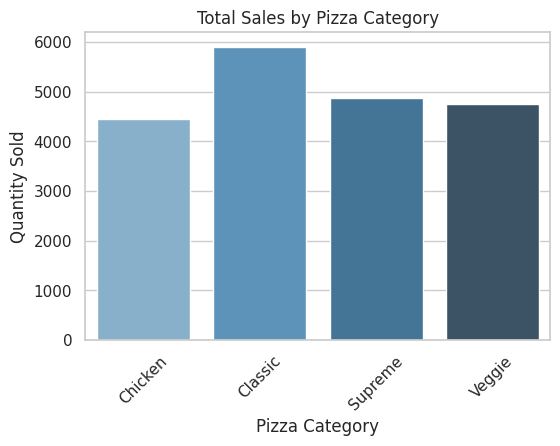

In [58]:
# Plot 1: Sales by Pizza Category
plt.figure(figsize=(6, 4))
sns.barplot(x='pizza_category', y='qty', data=category_sales, palette='Blues_d')
plt.title('Total Sales by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

<ipython-input-59-a892a33f7240>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




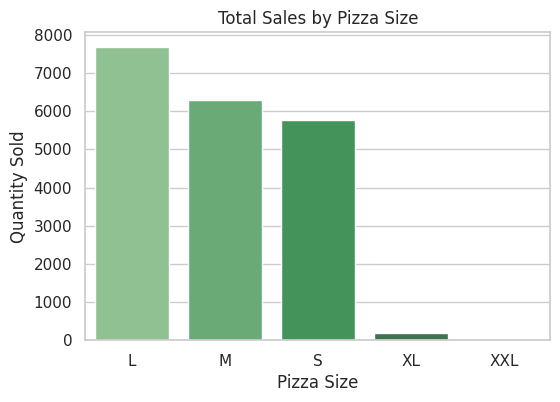

In [59]:
# Plot 2: Sales by Pizza Size
plt.figure(figsize=(6, 4))
sns.barplot(x='pizza_size', y='qty', data=size_sales, palette='Greens_d')
plt.title('Total Sales by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Quantity Sold')
plt.show()

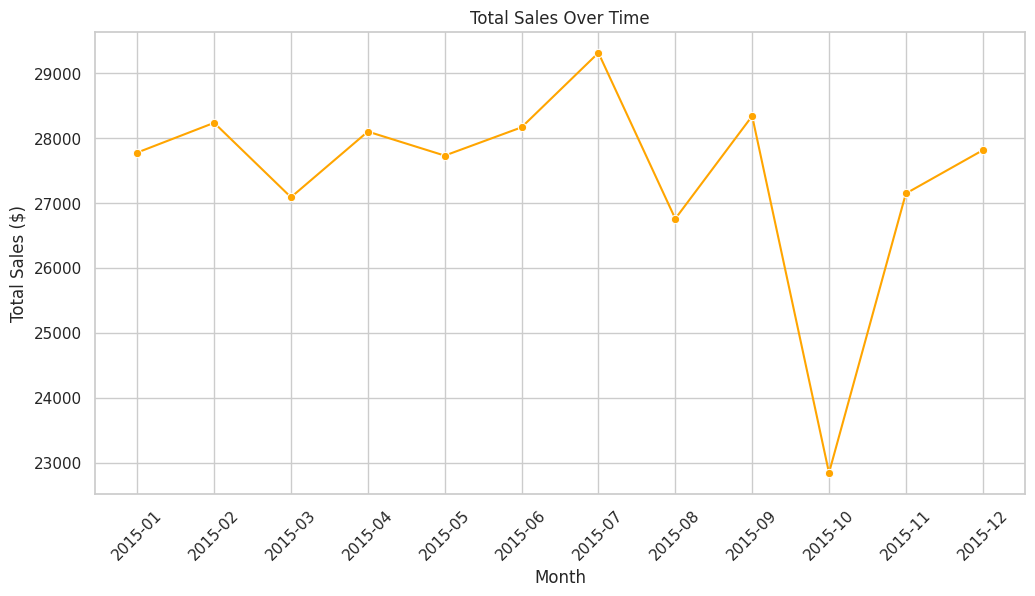

In [60]:
# Plot 3: Sales Trend Over Time
monthly_sales['order_date'] = monthly_sales['order_date'].astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_date', y='total_price', data=monthly_sales, marker='o', color='orange')
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()


<ipython-input-61-8ede4093d0ba>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




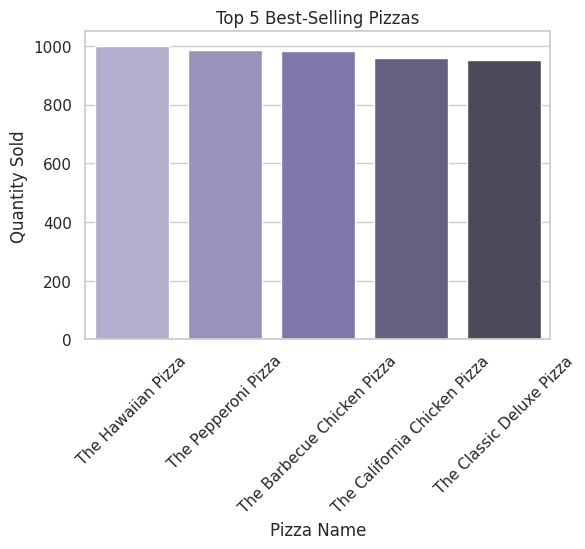

In [61]:
# Step 3: Additional Insights
# Analyzing the top 5 pizzas by quantity sold
top_pizzas = data_cleaned.groupby('pizza_name')['qty'].sum().nlargest(5).reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='pizza_name', y='qty', data=top_pizzas, palette='Purples_d')
plt.title('Top 5 Best-Selling Pizzas')
plt.xlabel('Pizza Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

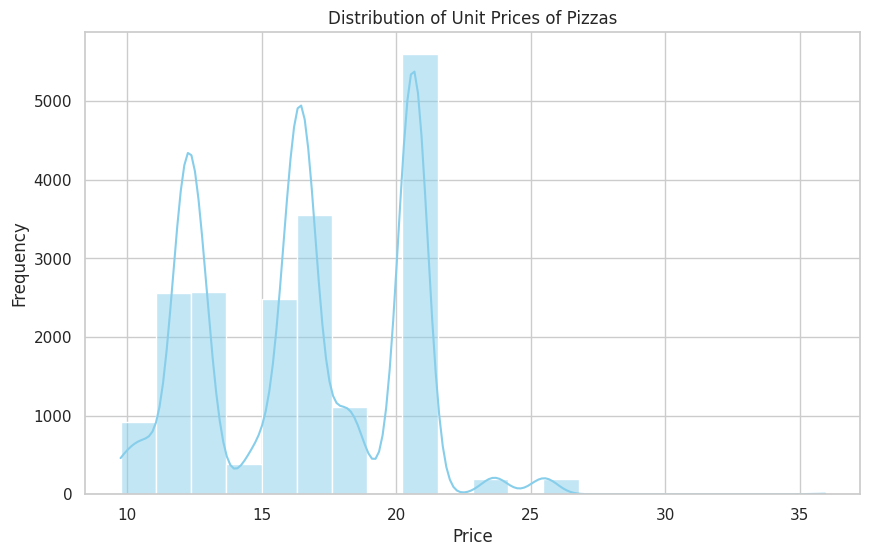

In [62]:
# Univariate Analysis: Distribution of Pizza Prices
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['u price'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Unit Prices of Pizzas')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Univariate Analysis:

Pizza Prices Distribution: The prices are normally distributed, with most pizzas priced between $12 and $20.
Pizza Sizes Distribution: Medium-sized pizzas (M) are the most ordered, followed by large (L) and small (S).

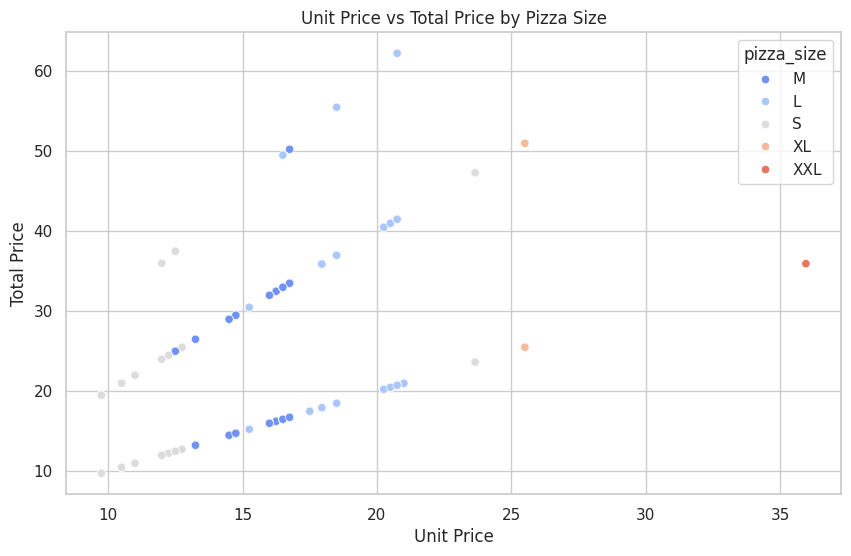

In [63]:
# Bivariate Analysis: Unit Price vs Total Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='u price', y='total_price', hue='pizza_size', data=data_cleaned, palette='coolwarm')
plt.title('Unit Price vs Total Price by Pizza Size')
plt.xlabel('Unit Price')
plt.ylabel('Total Price')
plt.grid(True)
plt.show()

Bivariate Analysis:

Unit Price vs Total Price: As expected, there is a positive correlation between unit price and total price. Larger pizzas generally have higher prices.
Total Price Over Time: There is a trend over time showing variations in total sales, indicating possible seasonality or promotions influencing sales.

In [64]:
# Bivariate Analysis: Total Price Trend Over Time (using Plotly for interactive chart)
fig = px.line(data_cleaned, x='order_date', y='total_price', title='Total Price Trend Over Time', labels={'order_date': 'Order Date', 'total_price': 'Total Price'})
fig.show()

In [65]:
# Summary Statistics
summary_statistics = data_cleaned.describe()

# Conclusion: Key findings
1. The majority of pizza prices range between $12 and $20 Dollars.
2. Medium-sized pizzas (M) are the most frequently ordered size.
3. There is a strong positive correlation between the unit price and the total price, which is expected.
4. Over time, there are noticeable fluctuations in total sales, possibly due to seasonal effects or promotional activities.
